In this notebook we will investigate weather centrality trading works.

In [52]:
import pandas as pd

# Specify the file path
file_path = 'CentralityData1.xlsx'

# Read the Excel file
df = pd.read_excel(file_path)
df

df = df.set_index('Unnamed: 0')

df = df.rename_axis('Date')
df.head()


,XLC,XLY,XLP,XLE,XLF,XLI,XLB,XLRE,XLV,XLK,XLU
Date,,,,,,,,,,,
2018-12-31,0.330756,0.378838,0.139973,0.399186,0.399186,0.388443,0.330756,0.004171,0.066074,0.378838,0.024519
2019-01-31,0.369636,0.368998,0.177422,0.369636,0.369636,0.368998,0.368998,0.004426,0.172696,0.345692,0.028370
2019-02-28,0.346814,0.378888,0.056888,0.378888,0.354510,0.378888,0.378888,0.001428,0.237097,0.346814,0.009124
2019-03-31,0.357648,0.383785,0.060168,0.357648,0.365956,0.383785,0.383785,0.030324,0.189297,0.357648,0.009639
2019-04-30,0.318355,0.359006,0.372948,0.359006,0.359006,0.365844,0.318355,0.054593,0.053553,0.359006,0.054593


In [53]:



df_high = df.apply(lambda row: row == row.max(), axis=1).astype(int)

df_high.head()

def adjust_pick_values(row):
    count = row.sum()
    return row / count if count > 0 else row

df_high_adjusted = df_high.apply(adjust_pick_values, axis=1)
df_high_adjusted.head()





,XLC,XLY,XLP,XLE,XLF,XLI,XLB,XLRE,XLV,XLK,XLU
Date,,,,,,,,,,,
2018-12-31,0.0,0.000000,0.0,0.50,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0
2019-01-31,0.0,0.000000,0.0,0.50,0.5,0.000000,0.000000,0.0,0.0,0.0,0.0
2019-02-28,0.0,0.250000,0.0,0.25,0.0,0.250000,0.250000,0.0,0.0,0.0,0.0
2019-03-31,0.0,0.333333,0.0,0.00,0.0,0.333333,0.333333,0.0,0.0,0.0,0.0
2019-04-30,0.0,0.000000,1.0,0.00,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Count')

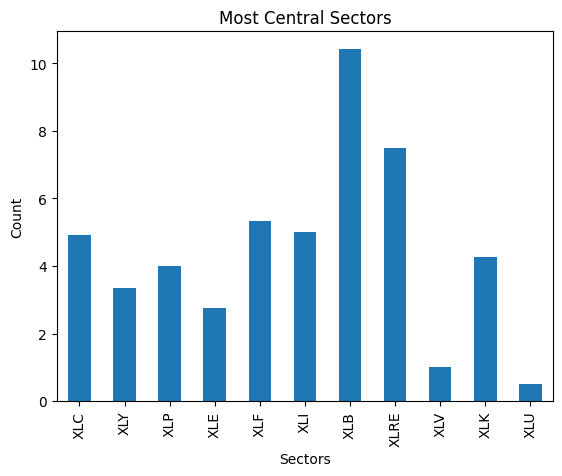

In [54]:


column_sums = df_high_adjusted.sum()

ax = column_sums.plot(kind='bar')
ax.set_title('Most Central Sectors')
ax.set_xlabel('Sectors')
ax.set_ylabel('Count')


Text(0, 0.5, 'Count')

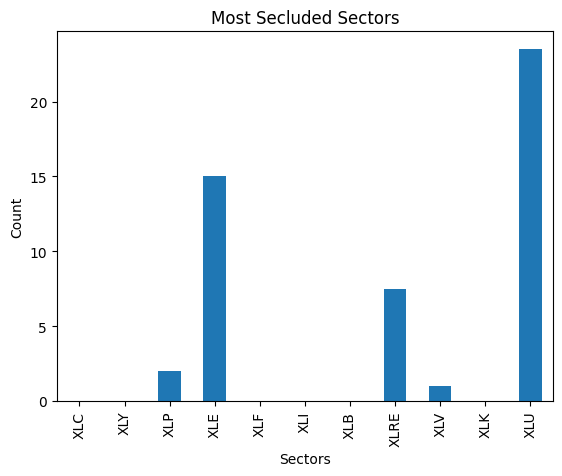

In [55]:

df_low = df.eq(df.min(axis=1), axis=0).astype(int)

df_low_adjusted = df_low.apply(adjust_pick_values, axis=1)
df_low_adjusted.head()
column_sums = df_low_adjusted.sum()
ax = column_sums.plot(kind='bar')
ax.set_title('Most Secluded Sectors')
ax.set_xlabel('Sectors')
ax.set_ylabel('Count')



In [56]:
import yfinance as yf


tickers = ['XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLC']

# Download historical data for the tickers
data = yf.download(tickers, start='2018-11-30', end='2022-12-31')

# Calculate the monthly returns
monthly_returns = data['Adj Close'].resample('M').ffill().pct_change().dropna()

monthly_returns.head()


picked_returns = monthly_returns * df_high_adjusted

picked_returns.head()

picked_returns.sum()

sum_of_each_value = picked_returns.sum().sum()
central_strat=sum_of_each_value
sum_of_each_value


[*********************100%%**********************]  10 of 10 completed


0.5651419035615418

We see that this strategy has a return of 0.5651424415948498. 

In [57]:
picked_returns = monthly_returns * df_low_adjusted
picked_returns.head()
sum_of_each_value = picked_returns.sum().sum()
sum_of_each_value

0.7398029634587346

At first we think these returns are amazing but keep in mind this is all driven by energy and is likely just an outlier.

<Axes: >

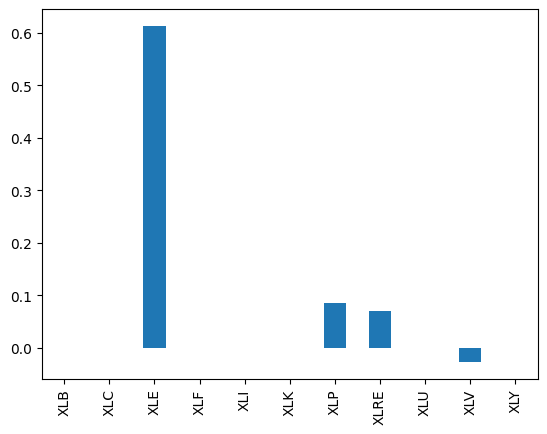

In [58]:
picked_returns.sum().plot(kind='bar')


In [59]:
sum_of_each_value_without_xle = picked_returns.sum().drop('XLE')
total_sum = sum_of_each_value_without_xle.sum()
decentral_strat=total_sum
total_sum


0.12646301072841104

Once we take into account energy we get a return,0.12646274442521532, in line with our expectations. Lastly we consider a purely random agent.

In [60]:
df_random = pd.DataFrame(0.1, index=df_high_adjusted.index, columns=df_high_adjusted.columns)
df_random.head()

,XLC,XLY,XLP,XLE,XLF,XLI,XLB,XLRE,XLV,XLK,XLU
Date,,,,,,,,,,,
2018-12-31,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-01-31,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-02-28,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-03-31,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2019-04-30,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1


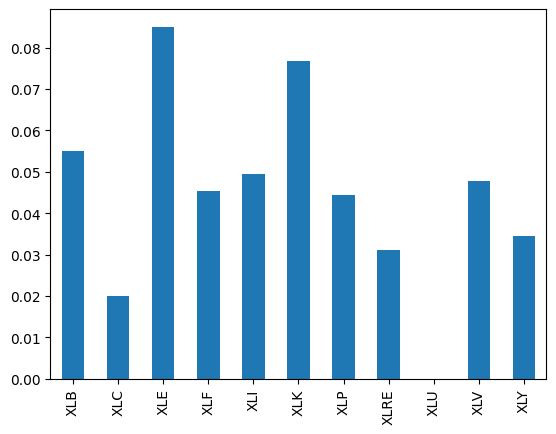

In [61]:

picked_returns = monthly_returns * df_random

picked_returns.head()
picked_returns.sum().plot(kind='bar')
sum_of_each_value = picked_returns.sum().sum()

In [62]:
sum_of_each_value_without_xle = picked_returns.sum().drop('XLE')
total_sum = sum_of_each_value_without_xle.sum()
rand_strat=total_sum
total_sum



0.4042715702002316

We see that the strategy performs just the same as a completely random agent

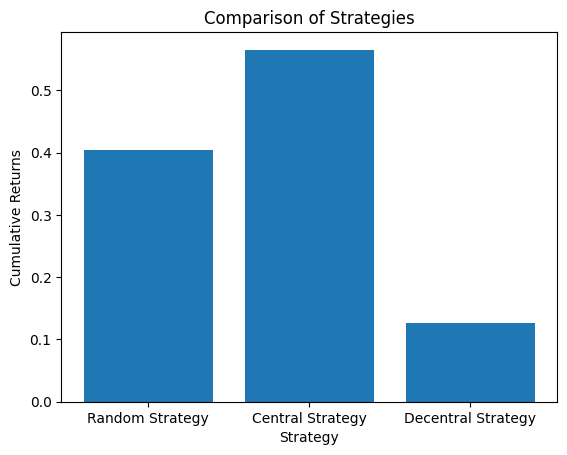

In [64]:
import matplotlib.pyplot as plt

# Values
values = [rand_strat, central_strat, decentral_strat]

# Labels
labels = ['Random Strategy', 'Central Strategy', 'Decentral Strategy']

# Plotting
plt.bar(labels, values)
plt.xlabel('Strategy')
plt.ylabel('Cumulative Returns')
plt.title('Comparison of Strategies')
plt.show()


we see our strategy in fact works